# Exploratory Data Analysis (EDA)

### Retrieve data

In [ ]:
!pip install gdown

In [ ]:
# Retrieve the mnist data (obtained from Kaggle and uploaded to my Google Drive)
!gdown "1KZTqa1PHu-FFtwE9PBBoF1jy-3_iUy2b"

Downloading...
From: https://drive.google.com/uc?id=1KZTqa1PHu-FFtwE9PBBoF1jy-3_iUy2b
To: /content/digit-recognizer.zip
100% 16.1M/16.1M [00:00<00:00, 141MB/s]


In [ ]:
!unzip "digit-recognizer.zip" && rm "digit-recognizer.zip"

Archive:  digit-recognizer.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


### Import and preprocess data

In [ ]:
import pandas as pd

train_df = pd.read_csv("train.csv")
train_df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Retrieve the labels series from the data, and normalize the colors
data_df = train_df.copy()
labels = data_df['label'].copy()
data_df = data_df.drop('label', axis = 1)

data_df = data_df / 255.0
print(data_df)
print(labels)

       pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
41995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
41996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
41997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
41998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
41999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

       pixel9  ...  pixel77

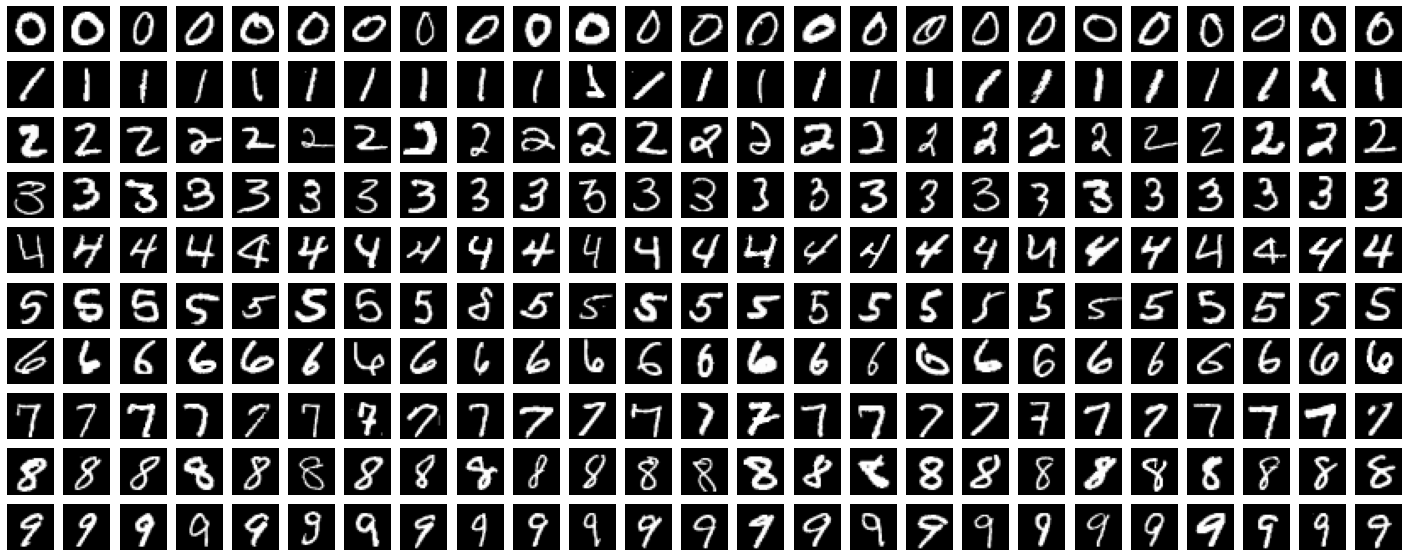

In [ ]:
# Prints out several columns of each digit
import numpy as np
import matplotlib.pyplot as plt

num_rows = 10
num_cols = 25

digit_plot = plt.figure(figsize = (num_cols, num_rows))

for label in range(num_rows):
    label_first_ten_indices = labels[labels == label].head(num_cols).index
    for i in range(num_cols):
        digit = data_df.iloc[[label_first_ten_indices[i]]].squeeze()
        digit_reshaped = np.reshape(digit.to_numpy(), (28, 28))
        digit_plot.add_subplot(num_rows, num_cols, num_cols * label + i + 1)
        plt.imshow(digit_reshaped, cmap = "gray")
        plt.axis("off")
plt.show()

In [ ]:
!pip install pyspark

     |████████████████████████████████| 281.4 MB 28 kB/s 
     |████████████████████████████████| 198 kB 57.2 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.1-py2.py3-none-any.whl size=281853642 sha256=07696e02b8f2347ec4f17238b8ef51c42de44880ef74f2b63675b4a038d253b1
  Stored in directory: /root/.cache/pip/wheels/9f/f5/07/7cd8017084dce4e93e84e92efd1e1d5334db05f2e83bcef74f
Successfully built pyspark


In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .master("local") \
    .appName("Final Project") \
    .getOrCreate()

In [17]:
train_data = spark.read.csv("train.csv", header = True, inferSchema = True)

train_df, test_df = train_data.randomSplit([.80, .20])

train_df.show()
print(train_df.count())

test_df.show()
print(test_df.count())

+-----+------+------+------+------+------+------+------+------+------+------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+-----

# Model Experiments

### Initial setup

In [ ]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.classification import MultilayerPerceptronClassifier

# Create the feature assemblers, assembled data, and evaluator
feature_assembler = VectorAssembler(inputCols = train_df.columns[1:], outputCol = "features")
train_assembled_df = feature_assembler.transform(train_df).select("label", "features")
test_assembled_df = feature_assembler.transform(test_df).select("label", "features")

evaluator = MulticlassClassificationEvaluator(labelCol = "label", predictionCol = "prediction", metricName = "accuracy")

In [ ]:
# Initialize hyperparameter variants
hidden_node_count_varied_layer_groups = [[784, pow(2, i), 10] for i in range(9)]
hidden_layer_count_varied_layer_groups = [[784] + [16] * i + [10] for i in range(5)]
blocksizes = [pow(2, i) for i in range(5, 10)]

In [ ]:
# Test accuracies with variations on the number of nodes in the hidden layer
mlp_hidden_node_count = MultilayerPerceptronClassifier(layers = hidden_node_count_varied_layer_groups[0], labelCol = "label", featuresCol = "features")
cv_hidden_node_count = CrossValidator(
    evaluator = evaluator,
    numFolds = 5,
    estimator = Pipeline(stages = [feature_assembler, mlp_hidden_node_count]),
    estimatorParamMaps = ParamGridBuilder().addGrid(mlp_hidden_node_count.layers, hidden_node_count_varied_layer_groups).build(),
    parallelism = 2
)

cv_hidden_node_count_fitted = cv_hidden_node_count.fit(train_df)

for i in range(len(hidden_node_count_varied_layer_groups)):
    print(f"Accuracy for {hidden_node_count_varied_layer_groups[i][1]} nodes in a single hidden layer: {cv_hidden_node_count_fitted.avgMetrics[i]}")

Accuracy for 1 nodes in a single hidden layer: 0.11075860742120608
Accuracy for 2 nodes in a single hidden layer: 0.20084384875842665
Accuracy for 4 nodes in a single hidden layer: 0.6683283711823678
Accuracy for 8 nodes in a single hidden layer: 0.7750098679641619
Accuracy for 16 nodes in a single hidden layer: 0.8182058148516801
Accuracy for 32 nodes in a single hidden layer: 0.8869406954700507
Accuracy for 64 nodes in a single hidden layer: 0.916391481265665
Accuracy for 128 nodes in a single hidden layer: 0.9384908421438117
Accuracy for 256 nodes in a single hidden layer: 0.9532958864387462


In [ ]:
# Compare train and test datasets on model with variations on the number of nodes in the hidden layer 
for hidden_node_count_varied_layer_group in hidden_node_count_varied_layer_groups:
    mlp = MultilayerPerceptronClassifier(layers = hidden_node_count_varied_layer_group, labelCol = "label", featuresCol = "features")
    mlp_fitted = mlp.fit(train_assembled_df)

    train_pred_df = mlp_fitted.transform(train_assembled_df)
    test_pred_df = mlp_fitted.transform(test_assembled_df)

    print(f"Train accuracy for {hidden_node_count_varied_layer_group[1]} nodes in a single hidden layer: {evaluator.evaluate(train_pred_df)}")
    print(f"Test accuracy for {hidden_node_count_varied_layer_group[1]} nodes in a single hidden layer: {evaluator.evaluate(test_pred_df)}")
    print()

Train accuracy for 1 nodes in a single hidden layer: 0.11077417053157332
Test accuracy for 1 nodes in a single hidden layer: 0.11453849832615973

Train accuracy for 2 nodes in a single hidden layer: 0.20296705910334165
Test accuracy for 2 nodes in a single hidden layer: 0.2026542324246772

Train accuracy for 4 nodes in a single hidden layer: 0.6841479367344512
Test accuracy for 4 nodes in a single hidden layer: 0.6794595887135342

Train accuracy for 8 nodes in a single hidden layer: 0.8042870733737661
Test accuracy for 8 nodes in a single hidden layer: 0.7929220468675275

Train accuracy for 16 nodes in a single hidden layer: 0.8365441788559876
Test accuracy for 16 nodes in a single hidden layer: 0.8247250119560019

Train accuracy for 32 nodes in a single hidden layer: 0.9075692710191462
Test accuracy for 32 nodes in a single hidden layer: 0.8943089430894309

Train accuracy for 64 nodes in a single hidden layer: 0.9361398501605422
Test accuracy for 64 nodes in a single hidden layer: 0.9

In [ ]:
# Test accuracies with variations on the number of hidden layers
mlp_num_hidden_layers = MultilayerPerceptronClassifier(layers = hidden_layer_count_varied_layer_groups[0], labelCol = "label", featuresCol = "features")
cv_num_hidden_layers = CrossValidator(
    evaluator = evaluator,
    numFolds = 5,
    estimator = Pipeline(stages = [feature_assembler, mlp_num_hidden_layers]),
    estimatorParamMaps = ParamGridBuilder().addGrid(mlp_num_hidden_layers.layers, hidden_layer_count_varied_layer_groups).build(),
    parallelism = 2
)

cv_num_hidden_layers_fitted = cv_num_hidden_layers.fit(train_df)

for i in range(len(hidden_layer_count_varied_layer_groups)):
    print(f"Accuracy for {len(hidden_layer_count_varied_layer_groups[i]) - 2} hidden layers of 16 nodes each: {cv_num_hidden_layers_fitted.avgMetrics[i]}")

Accuracy for 0 hidden layers of 16 nodes each: 0.17390145628049244
Accuracy for 1 hidden layers of 16 nodes each: 0.8182058148516801
Accuracy for 2 hidden layers of 16 nodes each: 0.7960467945370047
Accuracy for 3 hidden layers of 16 nodes each: 0.7231185669893188
Accuracy for 4 hidden layers of 16 nodes each: 0.7046803924790548


In [ ]:
# Compare train and test datasets on model with variations on the number of hidden layers
for hidden_layer_count_varied_layer_group in hidden_layer_count_varied_layer_groups:
    mlp = MultilayerPerceptronClassifier(layers = hidden_layer_count_varied_layer_group, labelCol = "label", featuresCol = "features")
    mlp_fitted = mlp.fit(train_assembled_df)
    
    train_pred_df = mlp_fitted.transform(train_assembled_df)
    test_pred_df = mlp_fitted.transform(test_assembled_df)

    print(f"Train accuracy for {len(hidden_layer_count_varied_layer_group) - 2} hidden layers of 16 nodes each: {evaluator.evaluate(train_pred_df)}")
    print(f"Test accuracy for {len(hidden_layer_count_varied_layer_group) - 2} hidden layers of 16 nodes each: {evaluator.evaluate(test_pred_df)}")
    print()

Train accuracy for 0 hidden layers of 16 nodes each: 0.11600665953145439
Test accuracy for 0 hidden layers of 16 nodes each: 0.11238641798182687

Train accuracy for 1 hidden layers of 16 nodes each: 0.8365441788559876
Test accuracy for 1 hidden layers of 16 nodes each: 0.8247250119560019

Train accuracy for 2 hidden layers of 16 nodes each: 0.826406231418718
Test accuracy for 2 hidden layers of 16 nodes each: 0.8162362505978001

Train accuracy for 3 hidden layers of 16 nodes each: 0.7194375074325128
Test accuracy for 3 hidden layers of 16 nodes each: 0.7144906743185079

Train accuracy for 4 hidden layers of 16 nodes each: 0.7381377095968605
Test accuracy for 4 hidden layers of 16 nodes each: 0.7342180774748924



In [18]:
# Test accuracies with variations on the batch size
mlp_batch_size = MultilayerPerceptronClassifier(layers = [784, 16, 10], labelCol = "label", featuresCol = "features", blockSize = blocksizes[0])
cv_batch_size = CrossValidator(
    evaluator = evaluator,
    numFolds = 5,
    estimator = Pipeline(stages = [feature_assembler, mlp_batch_size]),
    estimatorParamMaps = ParamGridBuilder().addGrid(mlp_batch_size.blockSize, blocksizes).build(),
    parallelism = 2
)

cv_batch_size_fitted = cv_batch_size.fit(train_df)

for i in range(len(blocksizes)):
    print(f"Accuracy for a block size of {blocksizes[i]}: {cv_batch_size_fitted.avgMetrics[i]}")

Accuracy for a block size of 32: 0.8477422605136302
Accuracy for a block size of 64: 0.8449466214384328
Accuracy for a block size of 128: 0.8441389234992045
Accuracy for a block size of 256: 0.8480080051762391
Accuracy for a block size of 512: 0.8460830487299923


In [19]:
# Compare train and test datasets on model with variations on the batch size
for blocksize in blocksizes:
    mlp = MultilayerPerceptronClassifier(layers = [784, 16, 10], labelCol = "label", featuresCol = "features", blockSize = blocksize)
    mlp_fitted = mlp.fit(train_assembled_df)
    
    train_pred_df = mlp_fitted.transform(train_assembled_df)
    test_pred_df = mlp_fitted.transform(test_assembled_df)

    print(f"Train accuracy for a block size of {blocksize}: {evaluator.evaluate(train_pred_df)}")
    print(f"Test accuracy for a block size of {blocksize}: {evaluator.evaluate(test_pred_df)}")
    print()

Train accuracy for a block size of 32: 0.8583429809718882
Test accuracy for a block size of 32: 0.8531216167448574

Train accuracy for a block size of 64: 0.8640425089797251
Test accuracy for a block size of 64: 0.8597377601347287

Train accuracy for a block size of 128: 0.8571852643452964
Test accuracy for a block size of 128: 0.8538433778419343

Train accuracy for a block size of 256: 0.8546917208418677
Test accuracy for a block size of 256: 0.8436184289666787

Train accuracy for a block size of 512: 0.8588476266809155
Test accuracy for a block size of 512: 0.849753398291832



# Results Analysis

- How did changing the hyperparameters affect the error of the model?

Based on the results above, it seems that increasing the number of nodes in the hidden layer results in less error when tested. This is likely due to the fact that more nodes in the hidden layers means that there are a greater number of weighted attributes that can be used to distinguish the digits.

It also seems that increasing the number of hidden layers increases the error past adding the first hidden layer. It seems that there was a significant decrease in error from including 1 hidden layer as opposed to having 0 hidden layers. However, after each additional layer past the first, the error seemed to increase. Perhaps the first hidden layer decreased error by allowing transformations to the input layer data via an activation function, transforming the inputs into data that the output layer could use, but adding additional layers added unnecessary complexity that did not improve performance.

For batch sizes, it seems that as the batch size decreased in size, the error decreased as well. Though, the effects were more marginal than with the other two hyperparameters and could be due to minor error. If this trend is to be believed, then this is likely due to the fact that smaller batch size is known to lead to poorer generalization, though they do take longer.

- Are there certain inputs (digits) of data that are harder to predict? If so, which ones? What other values is the model predicting for those digits?

There likely are. Digits like 0, 6, and 8 likely have lower predictability as they are very similar in structure, which likely makes the model have a harder time fitting them. 1 and 7 could also potentially be mixed up depending on how people draw them. (Some people draw 1 with a little "tail" at the top, which can be similar to a 7).

- Is the model over-fitting or under-fitting? How is this affected by the hyper 
parameters?

The models tend to underfit the data significantly at a low number of nodes in the hidden layer and seems to get better and better at fitting the data as it increases (with diminishing returns). The model underfits the data significantly at 0 hidden layers, gets significantly better at fitting the model at 1 hidden layer, and begins to worsen at fitting the data as additional hidden layers are added. The model loosely seems to worsen its fit as the batch size increases (very marginally). There does not seem to be any case of overfitting in any of the above examples.

- What would be some potential next steps to explore if someone were to continue this work and try to improve your model?

For someone to continue the work from here, they could see if combinations of the various hyperparameters have different results than adjusting each individually.